In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
os.chdir("G:\edwisor")

In [3]:
os.getcwd()

'G:\\edwisor'

In [4]:
# importing the data sheet
file = 'data2.xls'
data = pd.ExcelFile(file)
df1 = data.parse()

In [6]:
!pip install numpy --upgrade --user

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
!pip install fancyimpute

In [7]:
# Missing Value Analysis

from fancyimpute import MICE as MICE
data_new=MICE().complete(df1)

ModuleNotFoundError: No module named 'fancyimpute'

In [ ]:
# Outlier Analysis
# Detect Outliers

cnames = ['Reason','Month','Day','Seasons','Transportationexpense','Distance','Servicetime','Age','WorkloadAverage','Hittarget','Disciplinaryfailure','Education','Son','Socialdrinker','Socialsmoker','Pet','Weight','Height','Bodymassindex','Absenteeism']


In [ ]:
for i in cnames :
    print(i)
    q75, q25 = np.percentile(data_new.loc[:,i], [75 ,25])
    iqr = q75-q25
    min = q25 - (float(iqr)*1.5)
    max = q75 - (float(iqr)*1.5)
    out_low = data_new[data_new.loc[:,i]<min]
    out_high = data_new[data_new.loc[:,i]>max]
    

In [16]:
!pip install statsmodels

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
missing_value = pd.DataFrame(data_new.isnull().sum())

In [155]:
!pip install matplotlib

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [156]:
import matplotlib.pyplot as plt

In [116]:
# Creating function MAPE

def MAPE(y_true,y_pred):
    mape = np.mean(np.abs((y_true-y_pred)/y_true))*100
    return mape

In [119]:
# Feature Selection
!pip install seaborn
import seaborn as sms

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


<function matplotlib.pyplot.show>

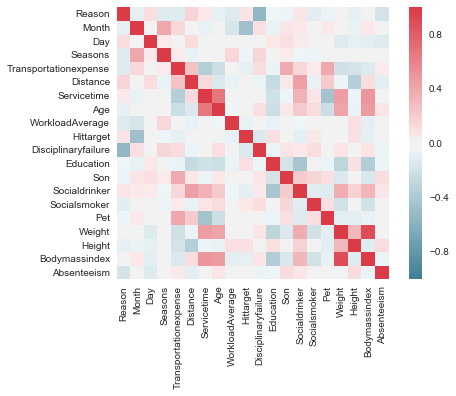

In [125]:
# Creating the heat map

import matplotlib.pyplot as plt
%matplotlib inline
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = data_new.corr()

#Plot using seaborn library
sms.heatmap(corr, cmap=sms.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show

In [130]:
# Dropping Weight as it has high Correlation 
data_new = data_new.drop(['Weight'],axis=1)

ValueError: labels ['Weight'] not contained in axis

In [131]:
headers = data_new.dtypes.index
print(headers)

Index(['Reason', 'Month', 'Day', 'Seasons', 'Transportationexpense',
       'Distance', 'Servicetime', 'Age', 'WorkloadAverage', 'Hittarget',
       'Disciplinaryfailure', 'Education', 'Son', 'Socialdrinker',
       'Socialsmoker', 'Pet', 'Height', 'Bodymassindex', 'Absenteeism'],
      dtype='object')


In [133]:
# split the variables into train and test

train,test = train_test_split(data_new, test_size =0.4)

In [134]:
!pip install statsmodels

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [135]:
# Multiple Linear Regression
import statsmodels.api as sm

C:\Users\NIL\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [138]:
model = sm.OLS(train.iloc[:,18], train.iloc[:,0:18]).fit()

In [139]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Absenteeism   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     10.79
Date:                Sat, 11 Aug 2018   Prob (F-statistic):           2.25e-25
Time:                        20:05:24   Log-Likelihood:                -1759.0
No. Observations:                 444   AIC:                             3554.
Df Residuals:                     426   BIC:                             3628.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Reason                   -0.5000      0.089     -5.642      0.000      -0.674      -0.326
Month                     0.0177      0.232      0.076      0.939      -0.438       0.474
Day                      -0.9256      0.455     -2.035      0.042      -1.820      -0.032
Seasons                   0.7873      0.654      1.203      0.230      -0.499       2.073
Transportationexpense    -0.0016      0.012     -0.132      0.895      -0.026       0.023
Distance                 -0.0599      0.058     -1.039      0.299      -0.173       0.053
Servicetime               0.0605      0.258      0.234      0.815      -0.447       0.568
Age                       0.1626      0.151      1.079      0.281      -0.134       0.459
WorkloadAverage       -1.576e-05   1.71e-05     -0.924      0.356   -4.93e-05    1.78e-05
Hittarget                 0.1032      0.164      0.628      0.530      -0.219       0.426
Disciplinaryfailure     -17.8421      3.267     -5.462      0.000     -24.263     -11.421
Education                -1.6967      1.175     -1.444      0.150      -4.007       0.613
Son                       0.7364      0.675      1.092      0.276      -0.589       2.062
Socialdrinker             1.8760      1.901      0.987      0.324      -1.861       5.613
Socialsmoker             -3.3955      2.495     -1.361      0.174      -8.300       1.509
Pet                       0.1334      0.681      0.196      0.845      -1.206       1.473
Height                    0.1085      0.095      1.142      0.254      -0.078       0.295
Bodymassindex            -0.3424      0.209     -1.635      0.103      -0.754       0.069
==============================================================================
Omnibus:                      490.047   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22180.810
Skew:                           5.133   Prob(JB):                         0.00
Kurtosis:                      36.069   Cond. No.                     1.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
predictions_LR = model.predict(test.iloc[:,0:18])

In [141]:
# Accuracy
MAPE(test.iloc[:,18], predictions_LR)

99.99736178514983

In [9]:
# Model Evaluation
# Mean Square Error
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(test.iloc[:,18], predictions_LR)
print(mse)

In [142]:
# random Forest Model Development

from sklearn.ensemble import RandomForestRegressor

C:\Users\NIL\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [143]:
RF_Model = RandomForestRegressor(n_estimators=500).fit(X_train,y_train)

In [144]:
RF_Prediction = RF_Model.predict(X_test)

In [8]:
# model Evaluation
# MSE(Mean Square Error)

from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y_test, RF_Prediction)
print(mse)